In [1]:
import os
from fastai import *
from fastai.vision import *
import  pandas as pd

In [2]:
input_path = 'dataset'
train_df = pd.read_csv(os.path.join(input_path,'train.csv'))
print(train_df.head())

Image         target
0   96.jpg       manipuri
1  163.jpg  bharatanatyam
2  450.jpg         odissi
3  219.jpg      kathakali
4  455.jpg         odissi


In [7]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=0.2, max_warp=0.)

In [8]:
np.random.seed(42)
src = (ImageList.from_csv(input_path, 'train.csv', folder='train')
       .split_by_rand_pct(0.2)
       .label_from_df())

In [9]:
data = (src.transform(tfms, size=128)
        .databunch(bs=64).normalize(imagenet_stats))

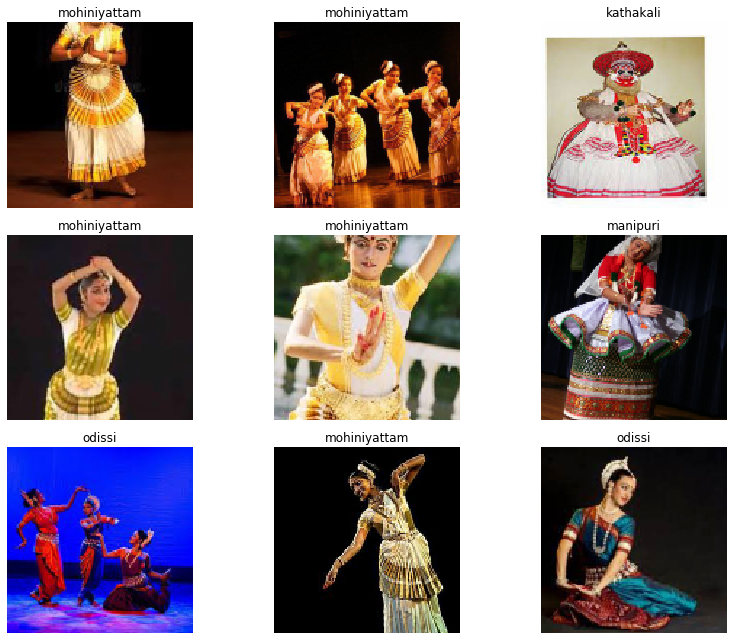

In [10]:
data.show_batch(rows=3, figsize=(12, 9))

In [11]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, models.resnet50, metrics=[acc_02, f_score])

In [12]:
learn

 affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (5): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=Fal

In [14]:


lr = 0.01
learn.fit_one_cycle(4, lr)

RuntimeError: The size of tensor a (8) must match the size of tensor b (64) at non-singleton dimension 1